# Taxi Fare Prediction

#### Importing Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('C:/Users/admin/Desktop/Imarticus/Machine learning DataSets/Taxi Fare Prediction/Dataset/TaxiFare.csv')

In [4]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
data.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


### Feature Engineering

In [7]:
import datetime

In [8]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup']) - datetime.timedelta(hours = 4)

In [9]:
data['Year'] = data['date_time_of_pickup'].dt.year
data['Month'] = data['date_time_of_pickup'].dt.month
data['Day'] = data['date_time_of_pickup'].dt.day
data['Hours'] = data['date_time_of_pickup'].dt.hour
data['Minutes'] = data['date_time_of_pickup'].dt.minute

In [10]:
data['mornight'] = np.where(data.Hours< 12, 0, 1)

In [11]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
Mumbai = [-19.0760, -72.8777]
Odisha = [19.8135, 85.8312]
bsas_in_radians = [radians(_) for _ in Mumbai]
paris_in_radians = [radians(_) for _ in Odisha]
result = haversine_distances([bsas_in_radians, paris_in_radians])
print(result * 6371000/1000) # multiply by Earth radius to get kilometers

[[    0.         17782.61298785]
 [17782.61298785     0.        ]]


In [12]:
from sklearn.metrics.pairwise import haversine_distances

In [13]:
### Function

from math import radians, cos, sin, asin, sqrt

def haversine(data):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1 = np.radians(data["latitude_of_pickup"])
    lat2 = np.radians(data["latitude_of_dropoff"])
    
    
    # Based on the formula x1= drop_lat, x2 = drop_long
    dlat = np.radians(data['latitude_of_dropoff'] - data['latitude_of_pickup'])
    dlong = np.radians(data['longitude_of_dropoff'] - data['longitude_of_pickup'])

    # haversine formula 
    # we will get the distance in kilometers by this formula 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [14]:
#New variable Total Distance
data['Total_distance'] = haversine(data)

In [15]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight,Total_distance
0,26:21.0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26,1,1.030764
1,52:16.0,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52,1,8.450134
2,35:00.0,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35,1,1.389525
3,30:42.0,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30,0,2.799270
4,51:00.0,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51,0,1.999157


In [16]:
# Dropping the unwanted variables from the data
data.drop(['unique_id','date_time_of_pickup','longitude_of_pickup','longitude_of_dropoff','latitude_of_pickup'],axis=1,inplace=True)

In [17]:
data.describe()

,amount,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight,Total_distance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,39.926251,1.667840,2011.738560,6.277660,15.689260,12.037400,29.665420,0.539800,18.508946
std,9.685557,6.014737,1.289195,1.862804,3.461942,8.660559,5.848911,17.306535,0.498418,355.564309
min,-5.000000,-74.006377,0.000000,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,40.734372,1.000000,2010.000000,3.000000,8.000000,7.000000,15.000000,0.000000,1.223146
50%,8.500000,40.753372,1.000000,2012.000000,6.000000,16.000000,12.000000,30.000000,1.000000,2.120114
75%,12.500000,40.768167,2.000000,2013.000000,9.000000,23.000000,17.000000,45.000000,1.000000,3.895570
max,200.000000,43.415190,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,1.000000,8667.818812


### Observation
1. Their is skewness in the data variables amount, Total_distance.

In [18]:
#getting the missing values in data
data.isna().sum()

amount                 0
latitude_of_dropoff    0
no_of_passenger        0
Year                   0
Month                  0
Day                    0
Hours                  0
Minutes                0
mornight               0
Total_distance         0
dtype: int64

##### No missing values in the data.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount               50000 non-null  float64
 1   latitude_of_dropoff  50000 non-null  float64
 2   no_of_passenger      50000 non-null  int64  
 3   Year                 50000 non-null  int64  
 4   Month                50000 non-null  int64  
 5   Day                  50000 non-null  int64  
 6   Hours                50000 non-null  int64  
 7   Minutes              50000 non-null  int64  
 8   mornight             50000 non-null  int32  
 9   Total_distance       50000 non-null  float64
dtypes: float64(3), int32(1), int64(6)
memory usage: 3.6 MB


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

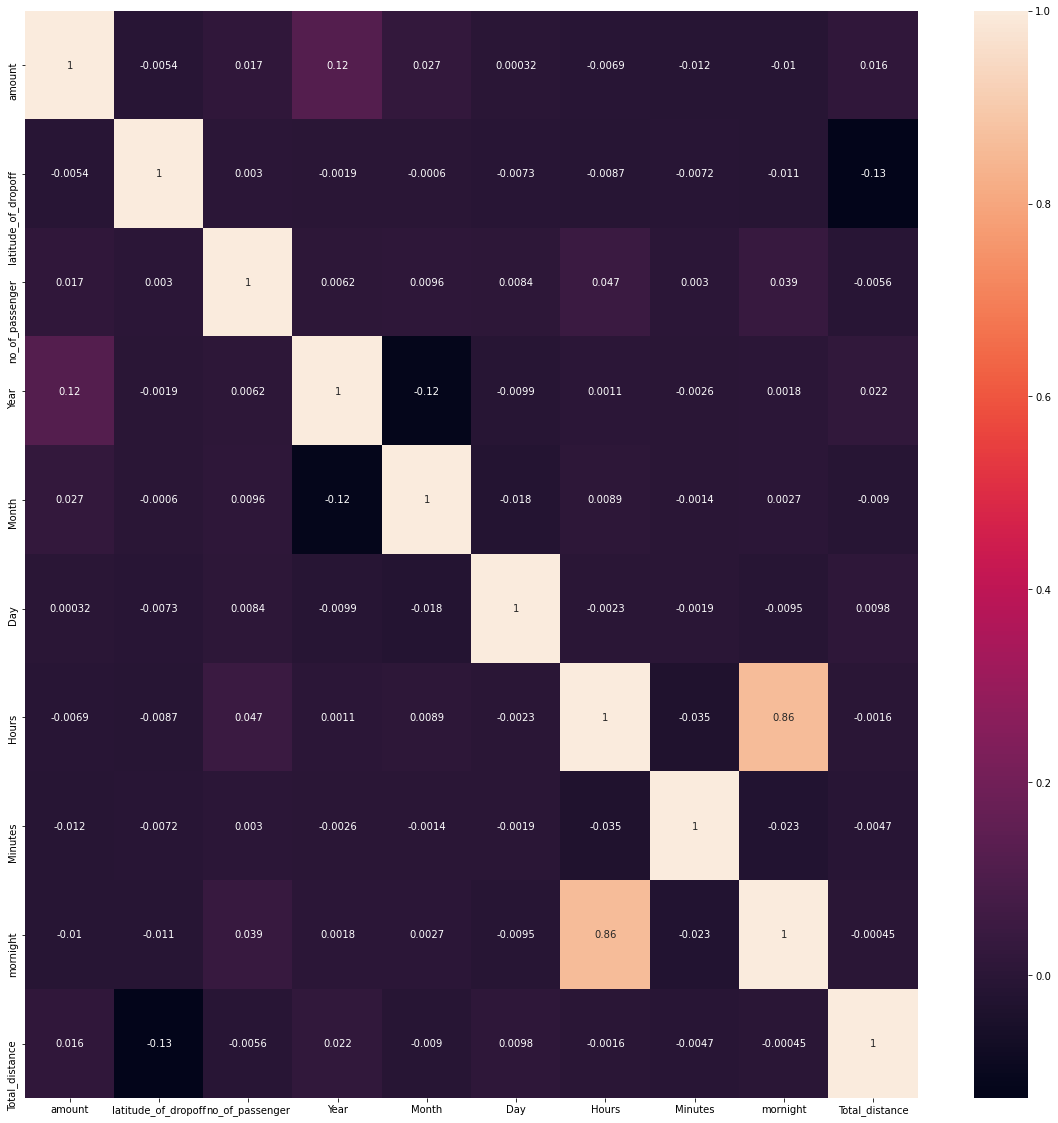

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

## Observation
1. There is high correlation between hours and mornight variables.(0.86)
2. While all the others variables in the data are highly correlated.

### Getting and Removing Outliers in Data

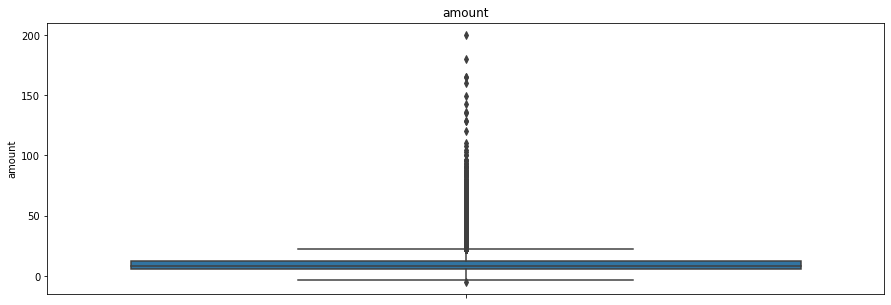

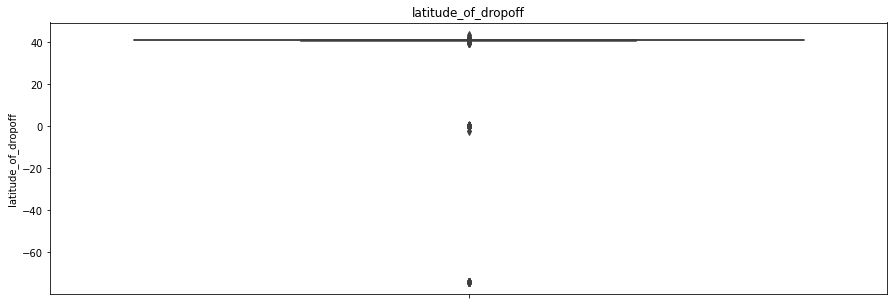

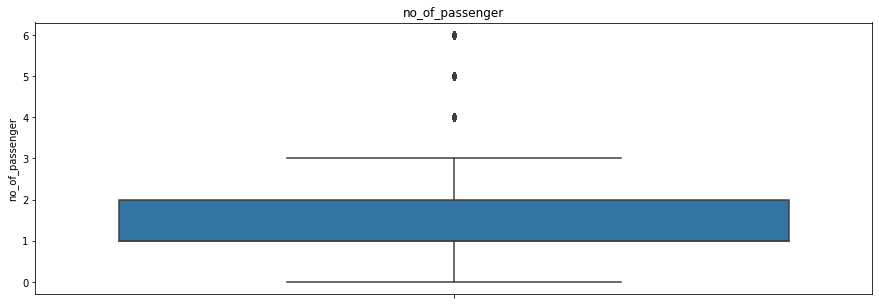

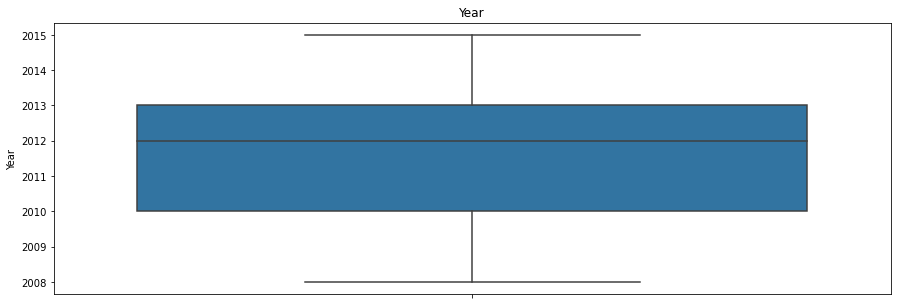

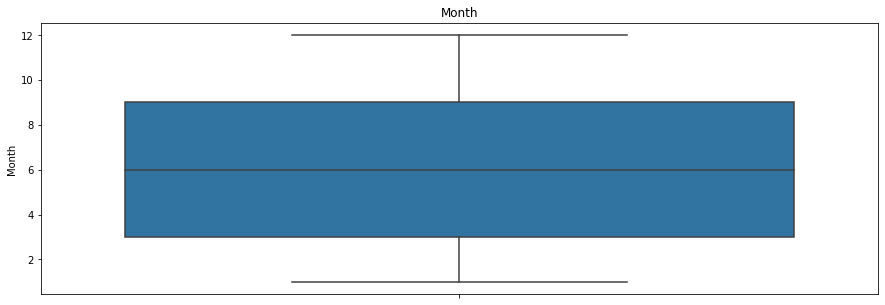

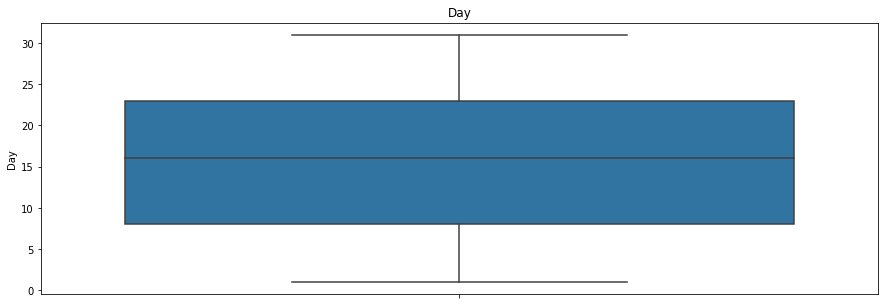

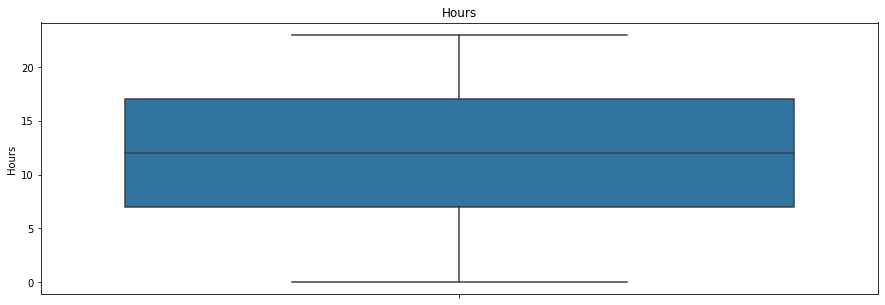

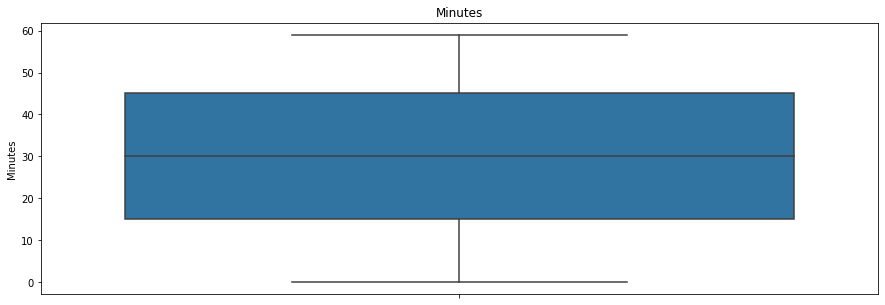

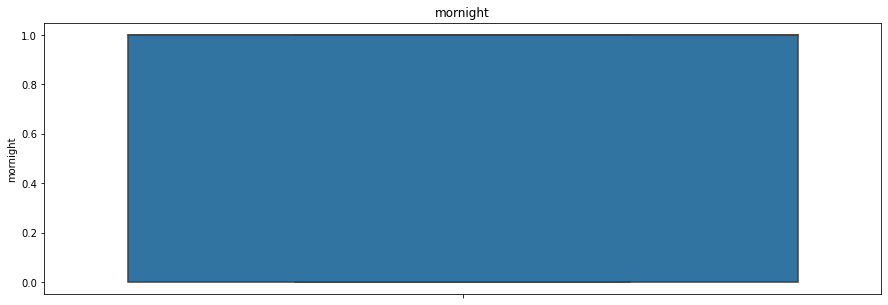

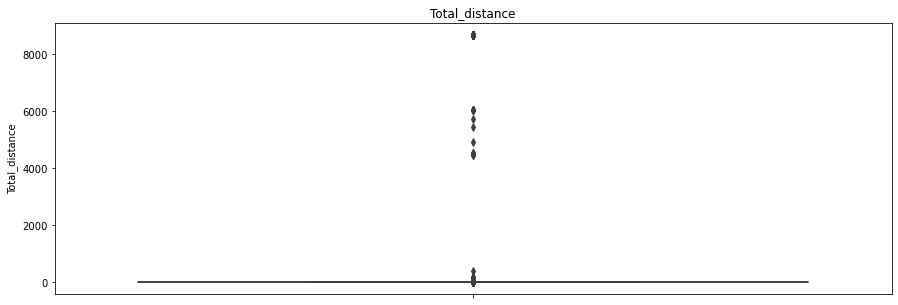

In [22]:
for i in data.columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(y=i,data=data)
    plt.title(i)

In [23]:
# Check for the outliers
from scipy import stats
z = abs(stats.zscore(data))
print(z)

[[0.70870882 0.13068477 0.51803399 ... 0.2117961  0.92332983 0.04915667]
 [0.5715607  0.14227741 0.51803399 ... 1.29054161 0.92332983 0.02829   ]
 [0.58481177 0.13704986 0.25765179 ... 0.30824387 0.92332983 0.04814767]
 ...
 [0.46091472 0.13853307 0.51803399 ... 1.34832383 1.0830366  0.04569025]
 [0.70870882 0.14189218 0.25765179 ... 1.19409384 1.0830366  0.05018468]
 [0.04792456 0.13925164 0.51803399 ... 0.96296496 1.0830366  0.05205565]]


In [24]:
threshold = 3
print(np.where(z>3))

(array([   11,    15,    26, ..., 49961, 49967, 49968], dtype=int64), array([1, 1, 1, ..., 0, 1, 0], dtype=int64))


In [25]:
# Remove the outliers
new_data = data[(z<3).all(axis=1)]
new_data.shape

(46702, 10)

## Building the Model(s)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x=new_data.drop(['amount'],axis=1)
y=new_data['amount'].astype('int64')

In [28]:
#Splitting the Training and Testing data having 30% of Test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [29]:
x_train.shape

(32691, 9)

###  Performing StandardScaler

In [30]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()

In [32]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Linear Regression

In [33]:
import statsmodels.api as sm
# Fit the model to the training data and testing data
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)
model = sm.OLS(y_train,x_train_sm)
results = model.fit()
# Making predictions using the model
linear_ypred = results.predict(x_test_sm)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     2982.
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:39:07   Log-Likelihood:                -97544.
No. Observations:               32691   AIC:                         1.951e+05
Df Residuals:                   32681   BIC:                         1.952e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7925      0.026    370.188      0.000       9.741       9.844
x1            -0.1915      0.027     -7.217      0.000      -0.243      -0.139
x2             0.0898      0.027      3.384      0.001       0.038       0.142
x3             1.0177      0.027     38.174      0.000       0.965       1.070
x4             0.3145      0.027     11.804      0.000       0.262       0.367
x5             0.0053      0.026      0.201      0.841      -0.047       0.057
x6             0.1256      0.052      2.417      0.016       0.024       0.227
x7            -0.0538      0.026     -2.032      0.042      -0.106      -0.002
x8            -0.2190      0.052     -4.223      0.000      -0.321      -0.117
x9             4.2046      0.027    158.569      0.000       4.153       4.257
==============================================================================
Omnibus:                    47726.000   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        102823477.149
Skew:                          -8.151   Prob(JB):                         0.00
Kurtosis:                     277.266   Cond. No.                         3.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
from sklearn import metrics
linear_mse = metrics.mean_squared_error(y_test,linear_ypred)
linear_r2 = metrics.r2_score(y_test,linear_ypred)
from math import sqrt
linear_rmse = sqrt(linear_mse)
print('Mean_Squared_Error:',linear_mse)
print('Root_Mean_Squared_Error',linear_rmse)
print('r_squared_value:',linear_r2)

Mean_Squared_Error: 22.75467490110583
Root_Mean_Squared_Error 4.7701860447057856
r_squared_value: 0.4430406929602527


## 

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt=DecisionTreeRegressor()

In [37]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
ypred=dt.predict(x_test)

In [39]:
ypred[0:5]

array([ 6.,  9., 10., 10.,  8.])

In [40]:
from sklearn import metrics

In [42]:
dt_mse = metrics.mean_squared_error(y_test, ypred)
dt_rmse = sqrt(dt_mse)
r_squared_dt = metrics.r2_score(y_test,ypred)
print('Mean_Squared_Error:',dt_mse)
print('Root_Mean_Squared_Error',dt_rmse)
print('R2_for_rf:',r_squared_dt)

Mean_Squared_Error: 16.4010420383984
Root_Mean_Squared_Error 4.049820000740576
R2_for_rf: 0.5985566461337486


## 

### RandomForest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf=RandomForestRegressor()

In [45]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
ypred1=rf.predict(x_test)

In [47]:
print(ypred1.shape)
print(ypred1[0:5])

(14011,)
[ 5.18 10.68  9.82 10.38  8.35]


In [48]:
from sklearn import metrics

In [49]:
# Model performance metrics
from math import sqrt

rf_mse = metrics.mean_squared_error(y_test, ypred1)
rf_rmse = sqrt(rf_mse)
r_squared_rf = metrics.r2_score(y_test,ypred1)
print('Mean_Squared_Error:',rf_mse)
print('Root_Mean_Squared_Error',rf_rmse)
print('R2_for_rf:',r_squared_rf)

Mean_Squared_Error: 8.232530069231318
Root_Mean_Squared_Error 2.869238587017698
R2_for_rf: 0.7984948472140058


## 

##  Support Vector Machines (Regressor)

In [58]:
from sklearn.svm import SVR

In [69]:
svcregressor = SVR(kernel='rbf')

In [70]:
svcregressor.fit(x_train,y_train)

SVR()

In [71]:
y_pred3 = svcregressor.predict(x_test)

In [72]:
# Model performance metrics
svr_mse = metrics.mean_squared_error(y_test, y_pred3)
svr_rmse = sqrt(rf_mse)
r_squared_svr = metrics.r2_score(y_test,y_pred3)
print('Mean_Squared_Error:',svr_mse)
print('Root_Mean_Squared_Error',svr_rmse)
print('R2_for_rf:',r_squared_svr)

Mean_Squared_Error: 8.562753500406577
Root_Mean_Squared_Error 2.869238587017698
R2_for_rf: 0.7904120679963286


## 

## Model Evaluation

In [73]:
# Compare model performance
Model_performance = pd.DataFrame({'Method':['Linear Regression','Decision Tree','Random Forest','Support Vector Machines'],
                       'Accuracy':[linear_r2 ,r_squared_dt,r_squared_rf,r_squared_svr]})
Model_performance 

,Method,Accuracy
0,Linear Regression,0.443041
1,Decision Tree,0.598557
2,Random Forest,0.798495
3,Support Vector Machines,0.790412


### We can conclude from above dataframe that, the accuracy of the Random Forest has higher accuracy than other models. Hence, The optimum model is Random Forest with accuracy 80%.